## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [144]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [145]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [146]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### There are no missing values indataset

### 3.2 Check Duplicates

In [147]:
df.duplicated().sum()

0

### There are no duplicate value

### 3.3 Check data types

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [149]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [150]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading minimum is much higher = 17

### 3.7 Exploring Data

In [151]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [152]:
print("Cetegories in 'gender' variable:  ",end="")
print(df['gender'].unique())

print("Cetegories in 'race_ethnicity' variable:  ",end="")
print(df['race_ethnicity'].unique())

print("Cetegories in 'lunch' variable:  ",end="")
print(df['lunch'].unique())

print("Cetegories in 'parental_level_of_education' variable:  ",end="")
print(df['parental_level_of_education'].unique())

print("Cetegories in 'test_preparation_course' variable:  ",end="")
print(df['test_preparation_course'].unique())

Cetegories in 'gender' variable:  ['female' 'male']
Cetegories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Cetegories in 'lunch' variable:  ['standard' 'free/reduced']
Cetegories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Cetegories in 'test_preparation_course' variable:  ['none' 'completed']


In [153]:
numeric_feature = df.select_dtypes(exclude='object').columns
categoric_feature = df.select_dtypes(include='object').columns

print(f"{len(numeric_feature)} Numerical Features: {numeric_feature}")
print(f"{len(categoric_feature)} Categorical Features: {categoric_feature}")

3 Numerical Features: Index(['math_score', 'reading_score', 'writing_score'], dtype='object')
5 Categorical Features: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


### 3.8 Adding columns for "Total Score" and "Average"

In [154]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Avg_score'] = df['Total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [155]:
math_full = df[df['math_score'] == 100]['math_score'].count()
read_full = df[df['reading_score'] == 100]['reading_score'].count()
write_full = df[df['writing_score'] == 100]['writing_score'].count()

print(f"Number of students who got full marks in math: {math_full}")
print(f"Number of students who got full marks in reading: {read_full}")
print(f"Number of students who got full marks in writing: {write_full}")

Number of students who got full marks in math: 7
Number of students who got full marks in reading: 17
Number of students who got full marks in writing: 14


In [156]:
math_less_20 = df[df['math_score'] < 20]['math_score'].count()
read_less_20 = df[df['reading_score'] < 20]['reading_score'].count()
write_less_20 = df[df['writing_score'] < 20]['writing_score'].count()

print(f"Number of students who got less than 20 marks in math: {math_less_20}")
print(f"Number of students who got less than 20 marks in reading: {read_less_20}")
print(f"Number of students who got less than 20 marks in writing: {write_less_20}")

Number of students who got less than 20 marks in math: 4
Number of students who got less than 20 marks in reading: 1
Number of students who got less than 20 marks in writing: 3


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

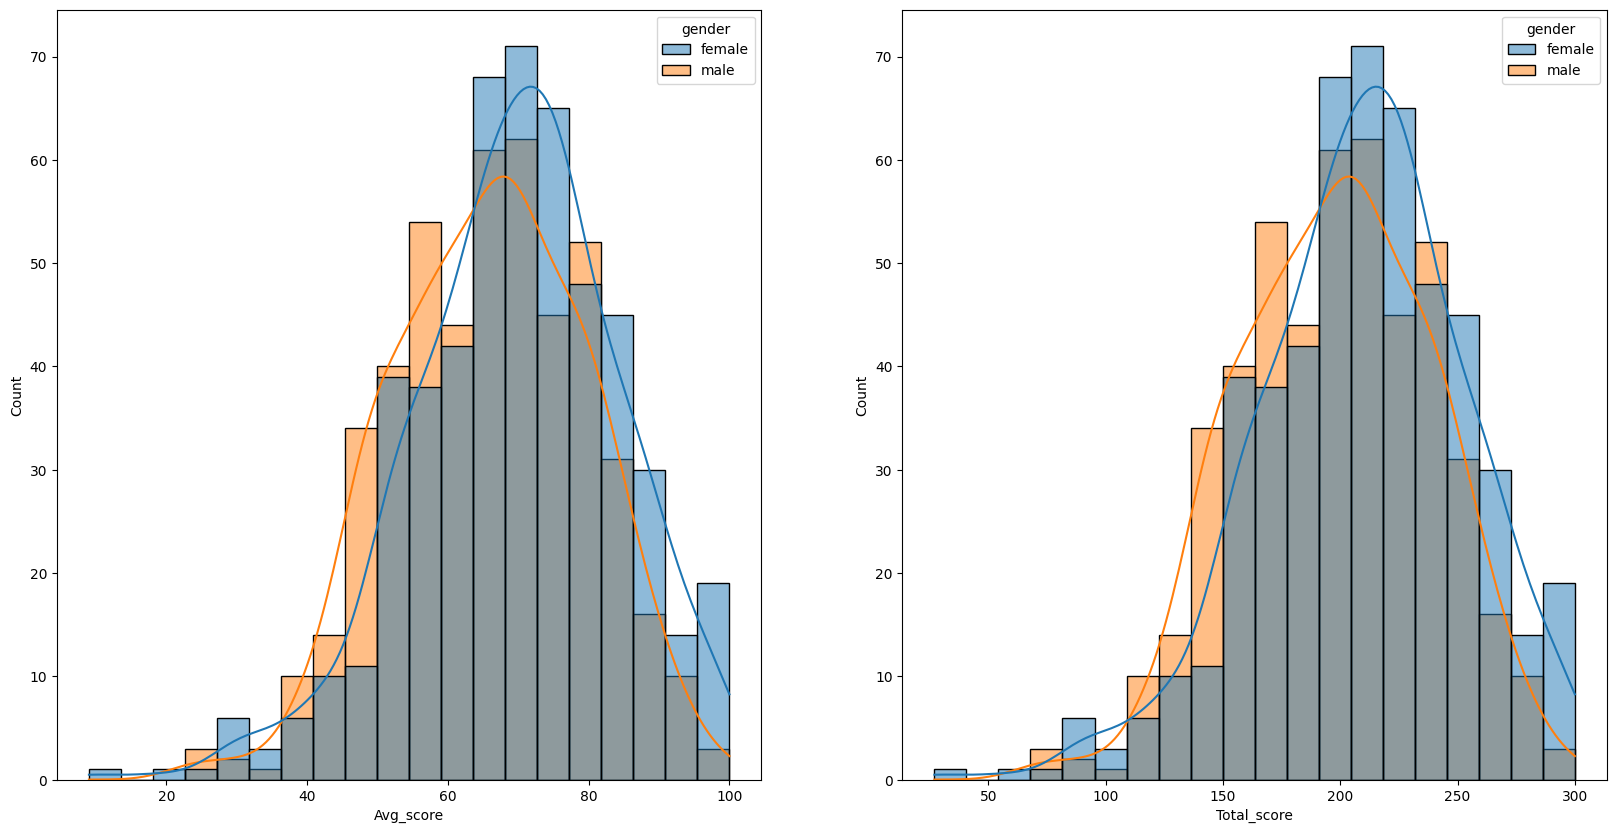

In [157]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.histplot(data=df, x='Avg_score', hue='gender', bins=20, kde=True)
plt.xlabel('Avg_score')
plt.subplot(122)
sns.histplot(data=df, x='Total_score', hue='gender', bins=20, kde=True)
plt.xlabel('Total_score')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

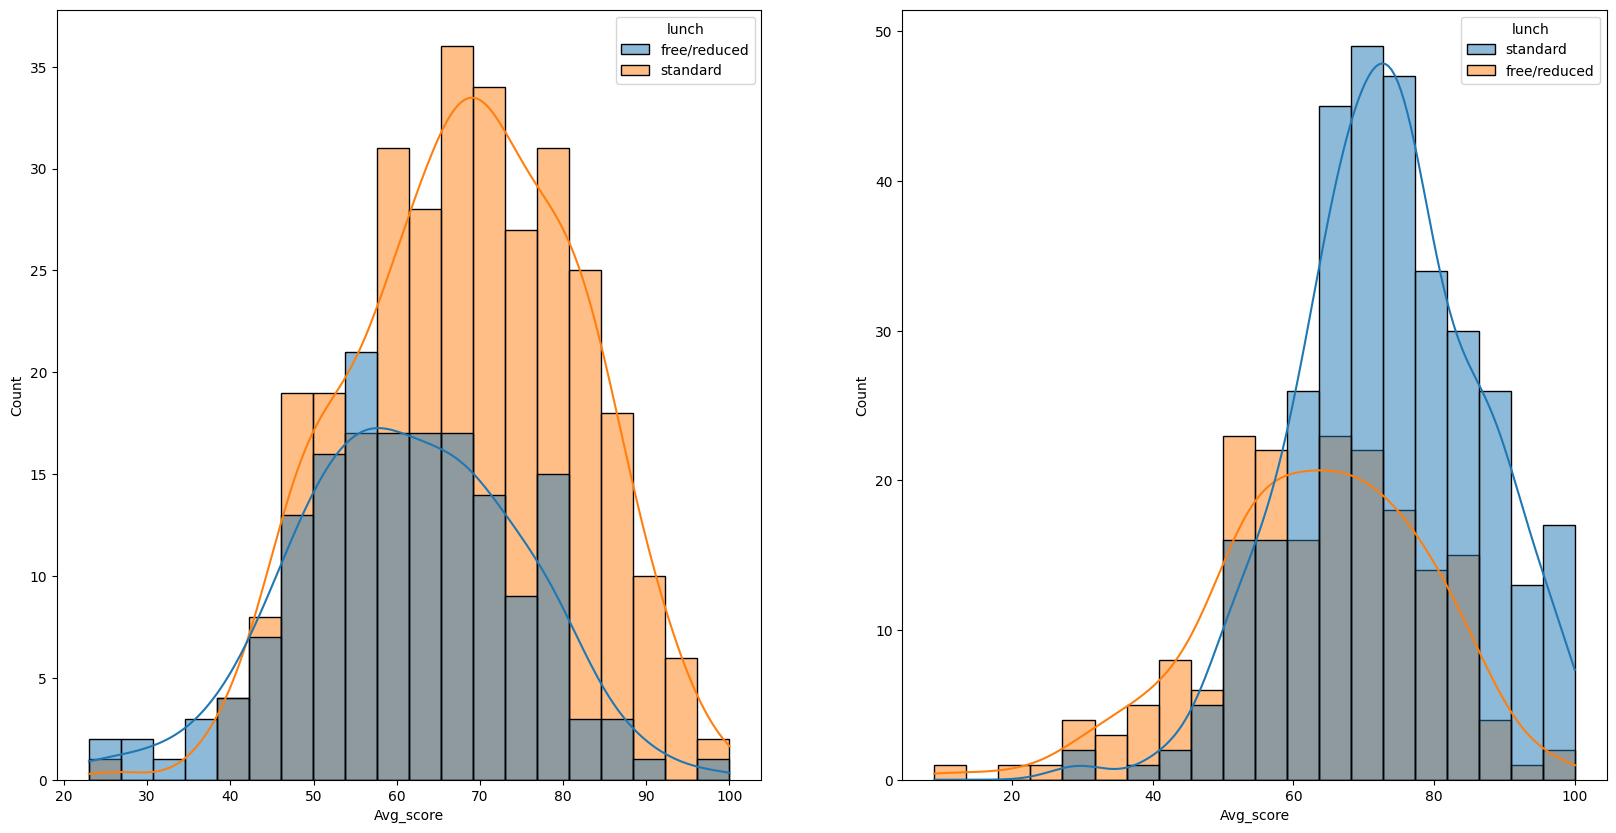

In [158]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.histplot(data=df[df['gender'] == 'male'], x='Avg_score', hue='lunch', bins=20, kde=True)
plt.xlabel('Avg_score')
plt.subplot(122)
sns.histplot(data=df[df['gender'] == 'female'], x='Avg_score', hue='lunch', bins=20, kde=True)
plt.xlabel('Avg_score')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

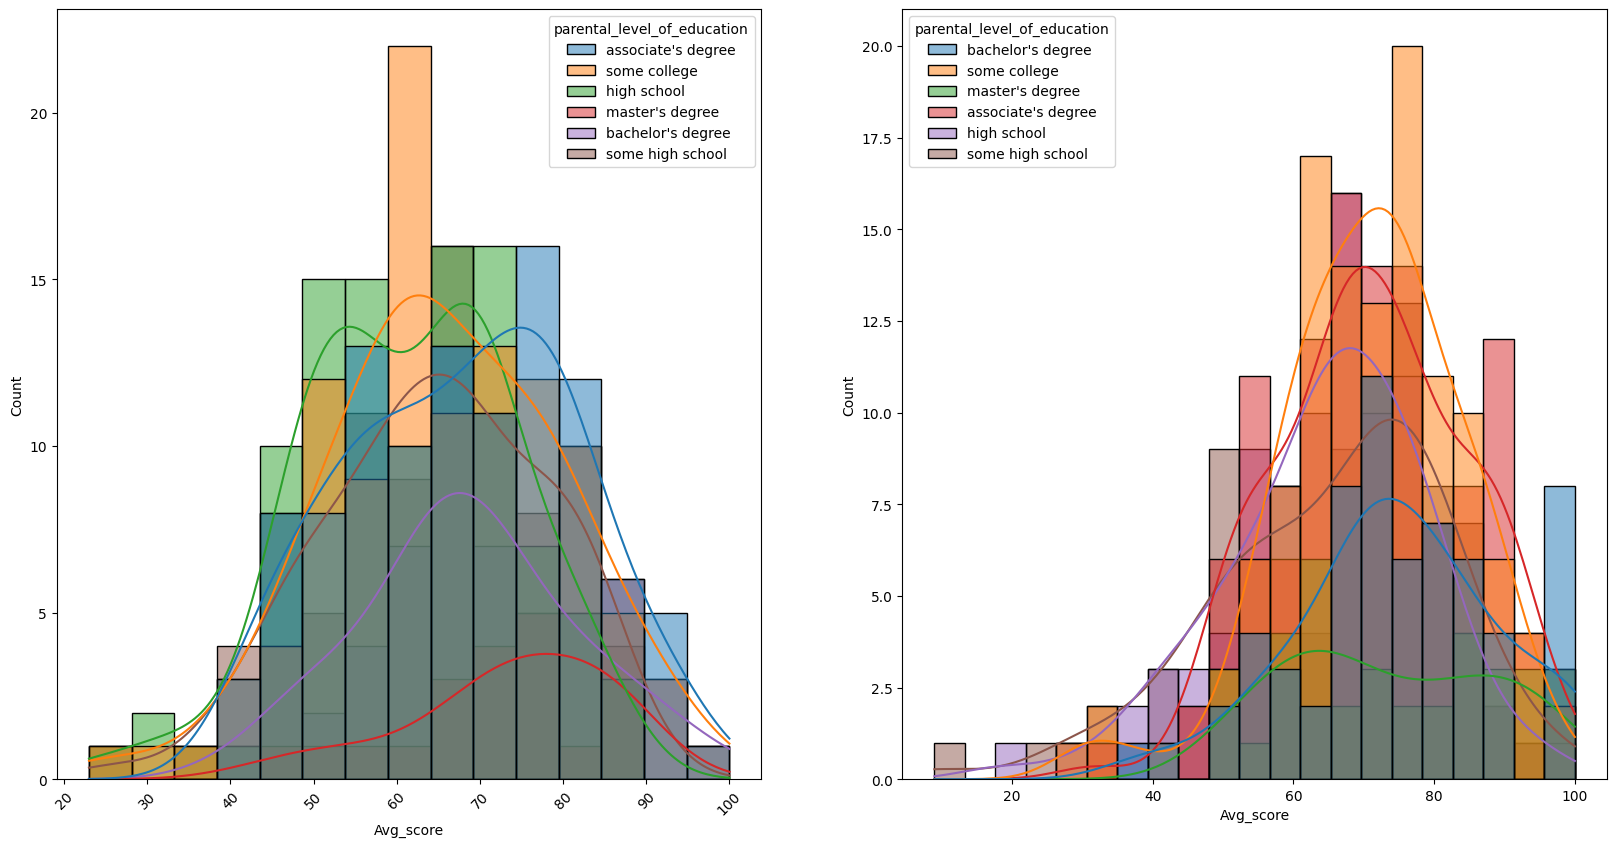

In [159]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.histplot(data=df[df['gender'] == 'male'],x='Avg_score', hue='parental_level_of_education',kde=True)
plt.xlabel('Avg_score')
plt.xticks(rotation=45)
plt.subplot(122)
sns.histplot(data=df[df['gender'] == 'female'],x='Avg_score', hue='parental_level_of_education',kde=True)
plt.xlabel('Avg_score')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [160]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


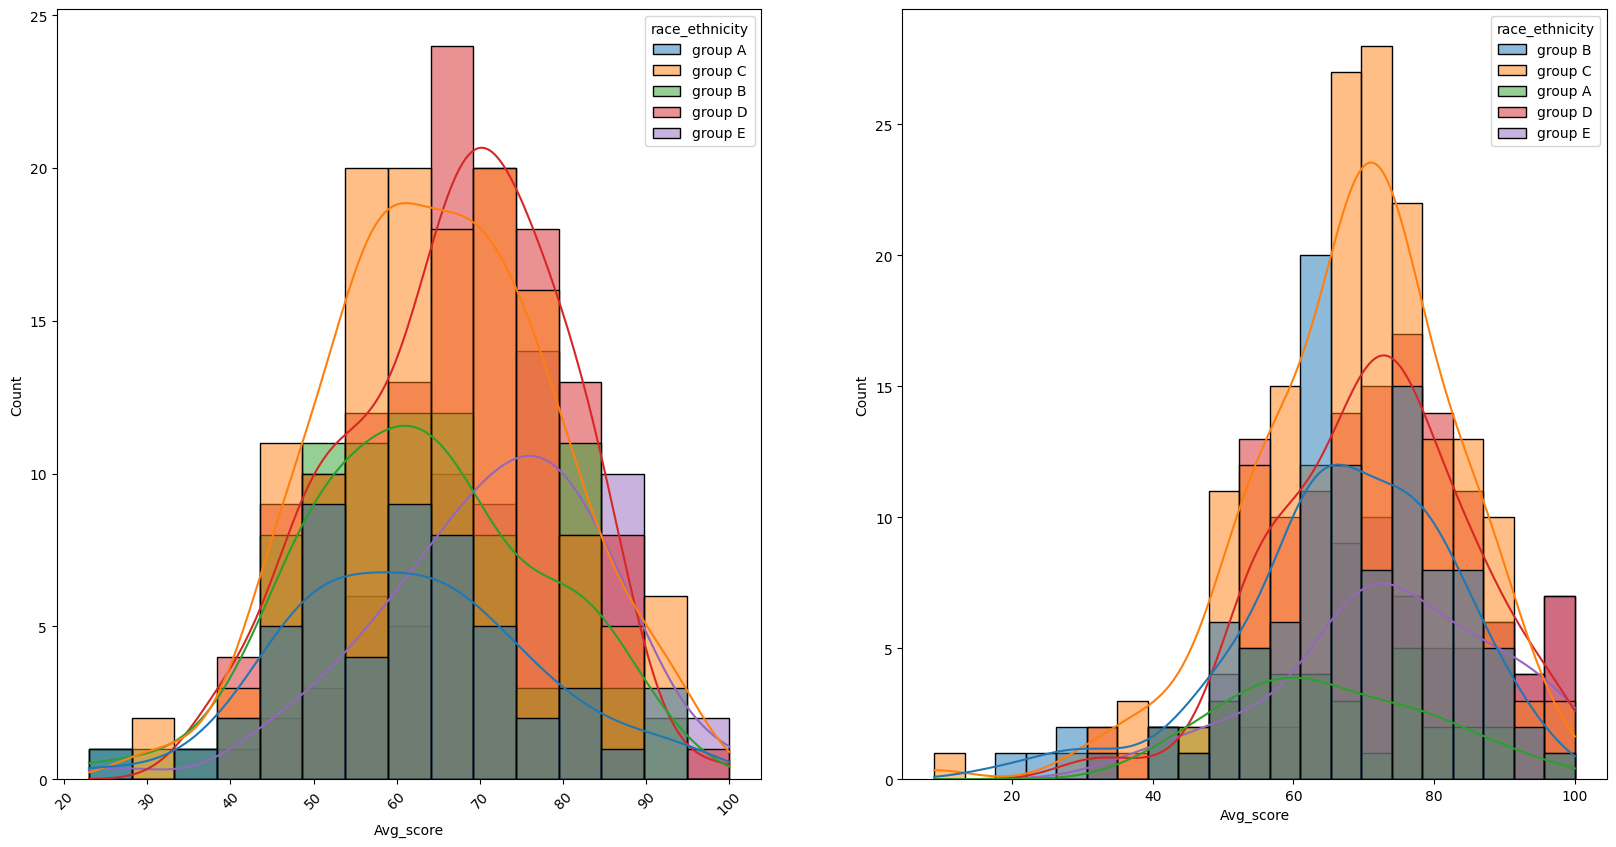

In [161]:
plt.figure(figsize=(20,10))
plt.subplot(121)
sns.histplot(data=df[df['gender'] == 'male'],x='Avg_score', hue='race_ethnicity',kde=True)
plt.xlabel('Avg_score')
plt.xticks(rotation=45)
plt.subplot(122)
sns.histplot(data=df[df['gender'] == 'female'],x='Avg_score', hue='race_ethnicity',kde=True)
plt.xlabel('Avg_score')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

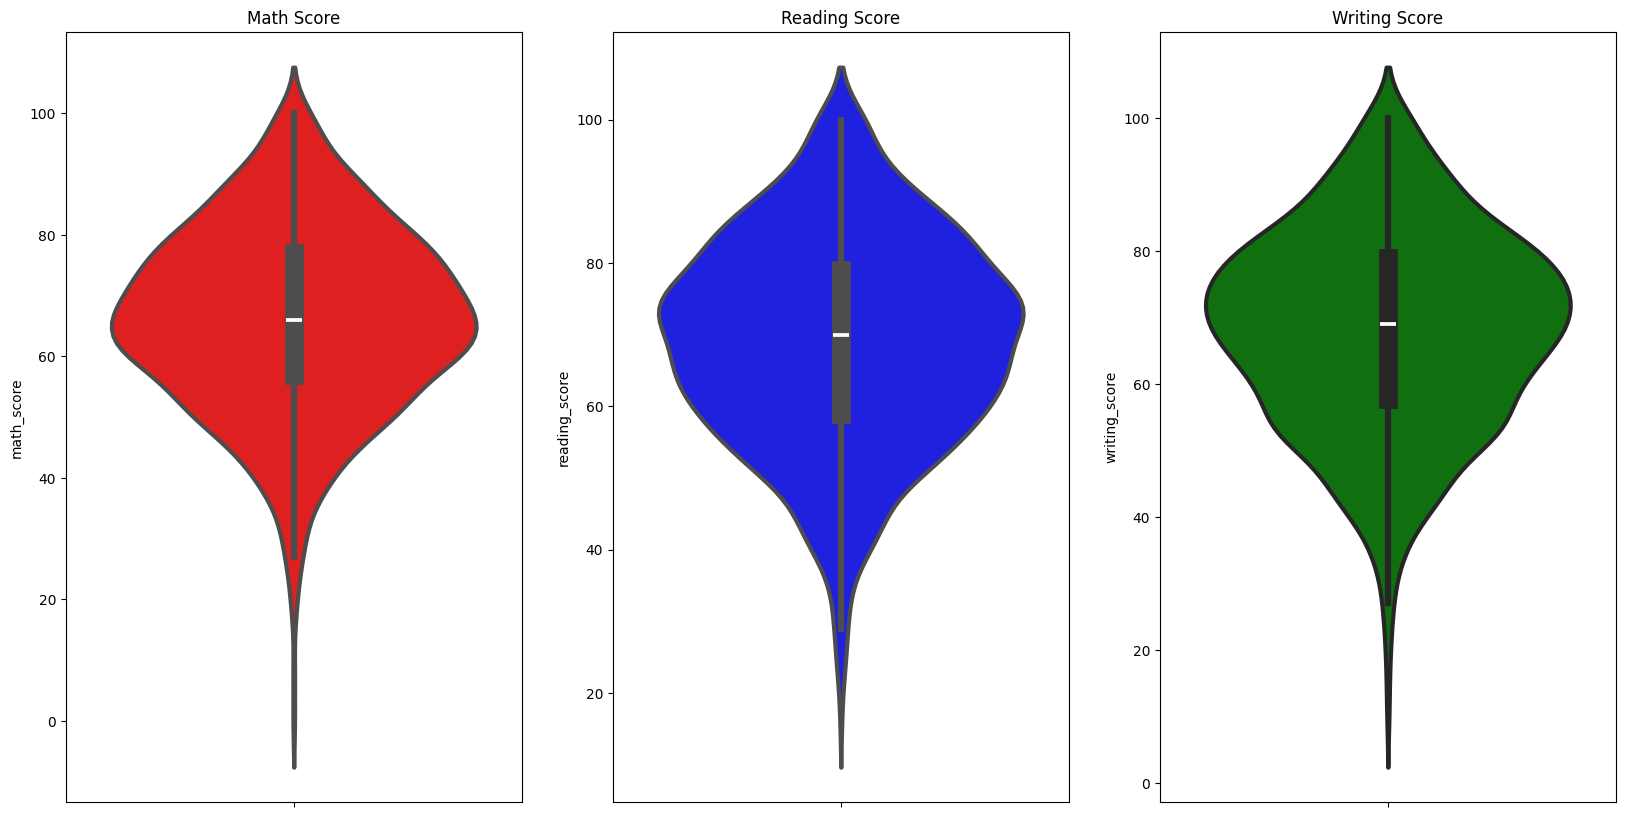

In [162]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Math Score")
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(132)
plt.title("Reading Score")
sns.violinplot(y='reading_score',data=df,color='blue',linewidth=3)
plt.subplot(133)
plt.title("Writing Score")
sns.violinplot(y='writing_score',data=df,color='green',linewidth=3)
plt.show()


#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

In [163]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


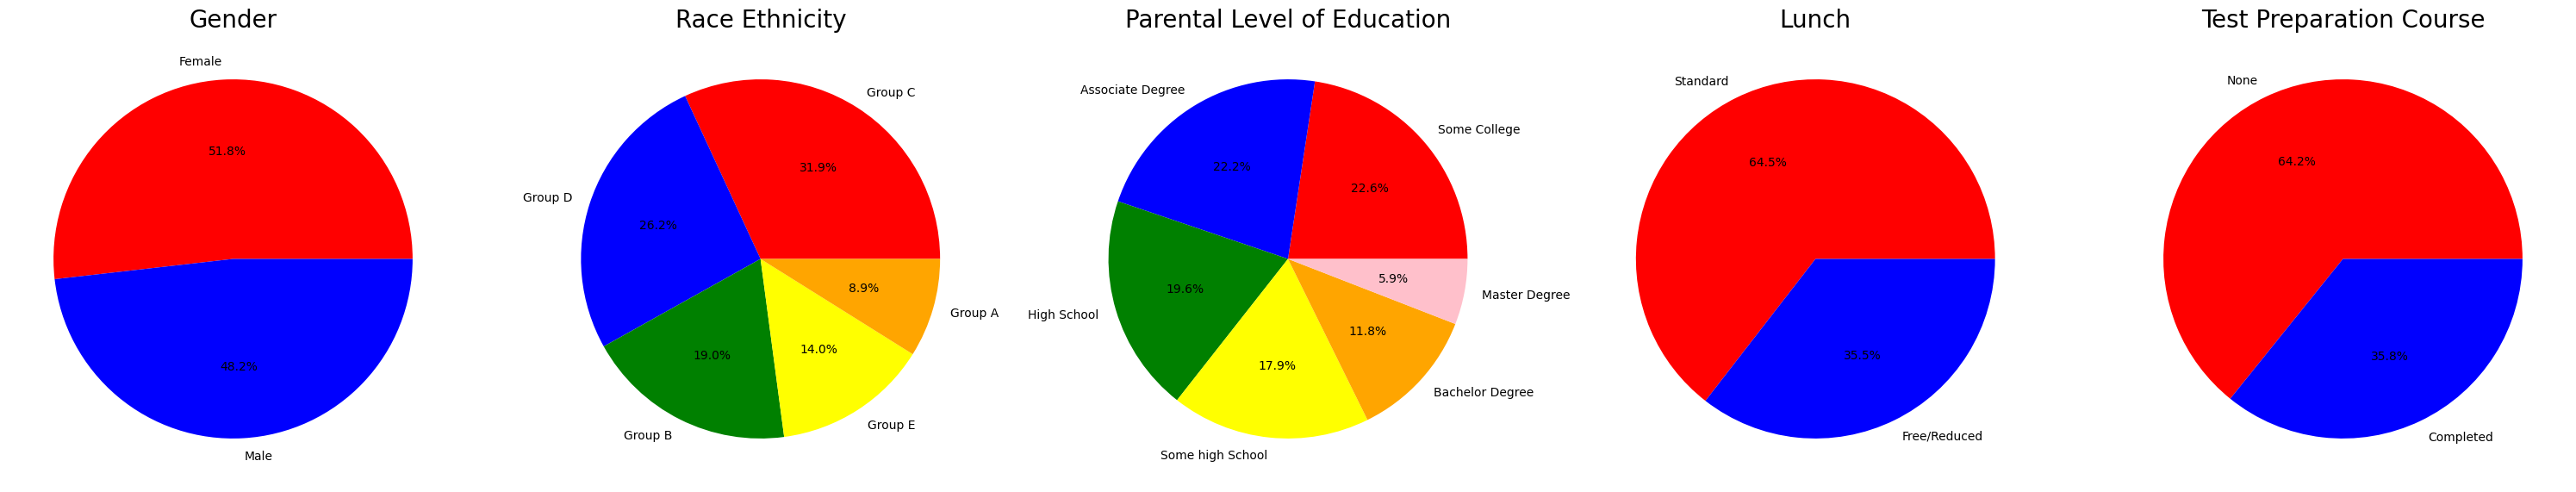

In [164]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red', 'blue']
plt.pie(size, labels=labels, colors=color, autopct='%1.1f%%')
plt.title('Gender', fontsize = 20)

plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D','Group B','Group E','Group A']
color = ['red', 'blue', 'green', 'yellow', 'orange']
plt.pie(size, labels=labels, colors=color, autopct='%1.1f%%')
plt.title('Race Ethnicity', fontsize = 20)

plt.subplot(153)
size = df['parental_level_of_education'].value_counts()
labels = ['Some College', 'Associate Degree', 'High School','Some high School','Bachelor Degree', 'Master Degree']
color = ['red', 'blue', 'green', 'yellow', 'orange', 'pink']
plt.pie(size, labels=labels, colors=color, autopct='%1.1f%%')
plt.title('Parental Level of Education', fontsize = 20)

plt.subplot(154)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
color = ['red', 'blue']
plt.pie(size, labels=labels, colors=color, autopct='%1.1f%%')
plt.title('Lunch', fontsize = 20)

plt.subplot(155)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
color = ['red', 'blue']
plt.pie(size, labels=labels, colors=color, autopct='%1.1f%%')
plt.title('Test Preparation Course', fontsize = 20)


plt.tight_layout()
plt.grid()

plt.show()


#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

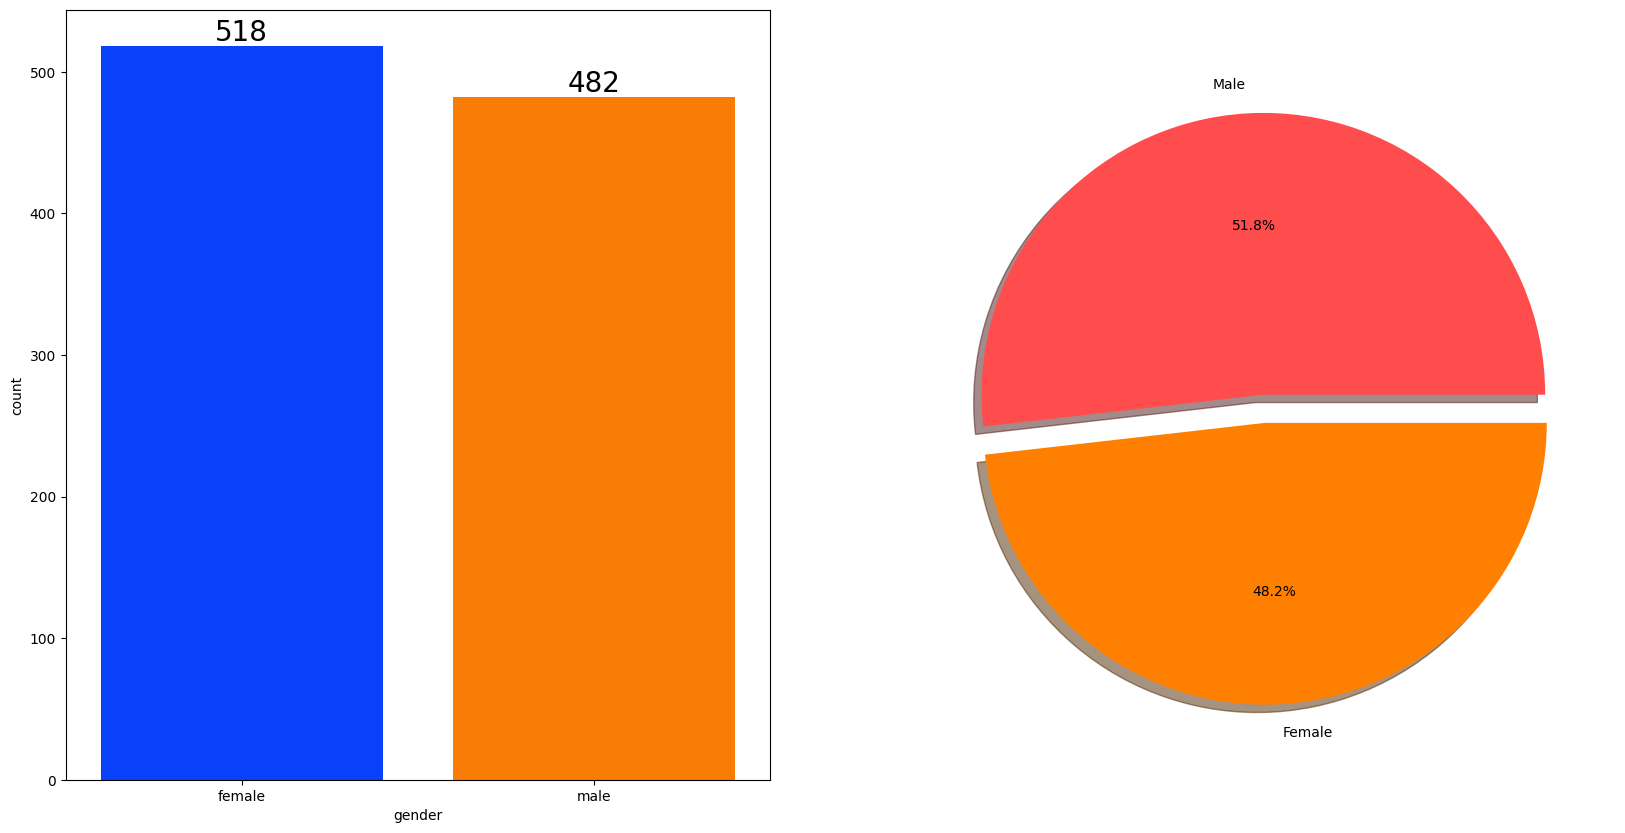

In [165]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [167]:
gender_group = df.groupby('gender').mean(numeric_only=True)

[69.56949806949807, 63.633204633204635]


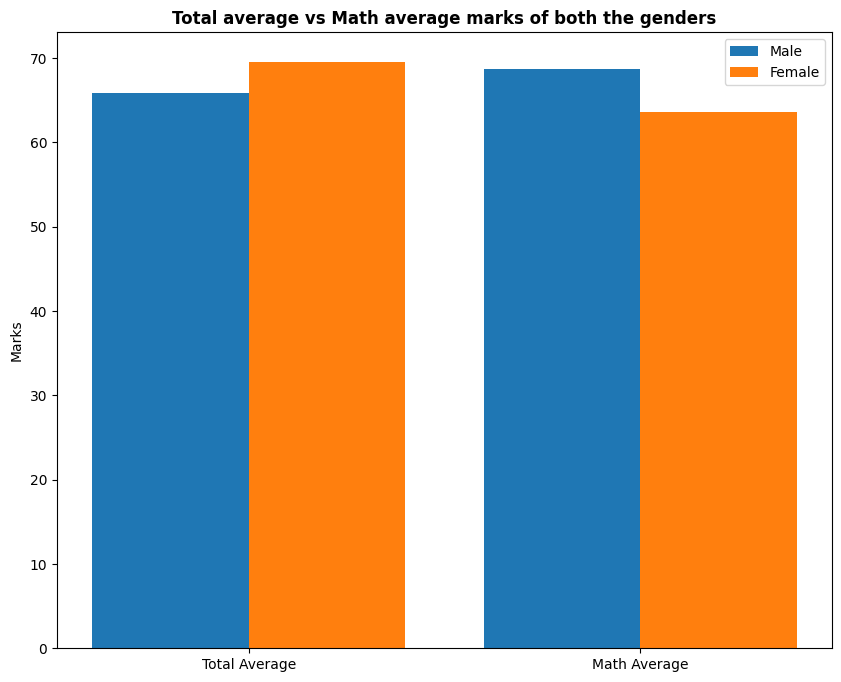

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['Avg_score']['female'], gender_group['math_score']['female']]
male_scores = [gender_group['Avg_score']['male'], gender_group['math_score']['male']]
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

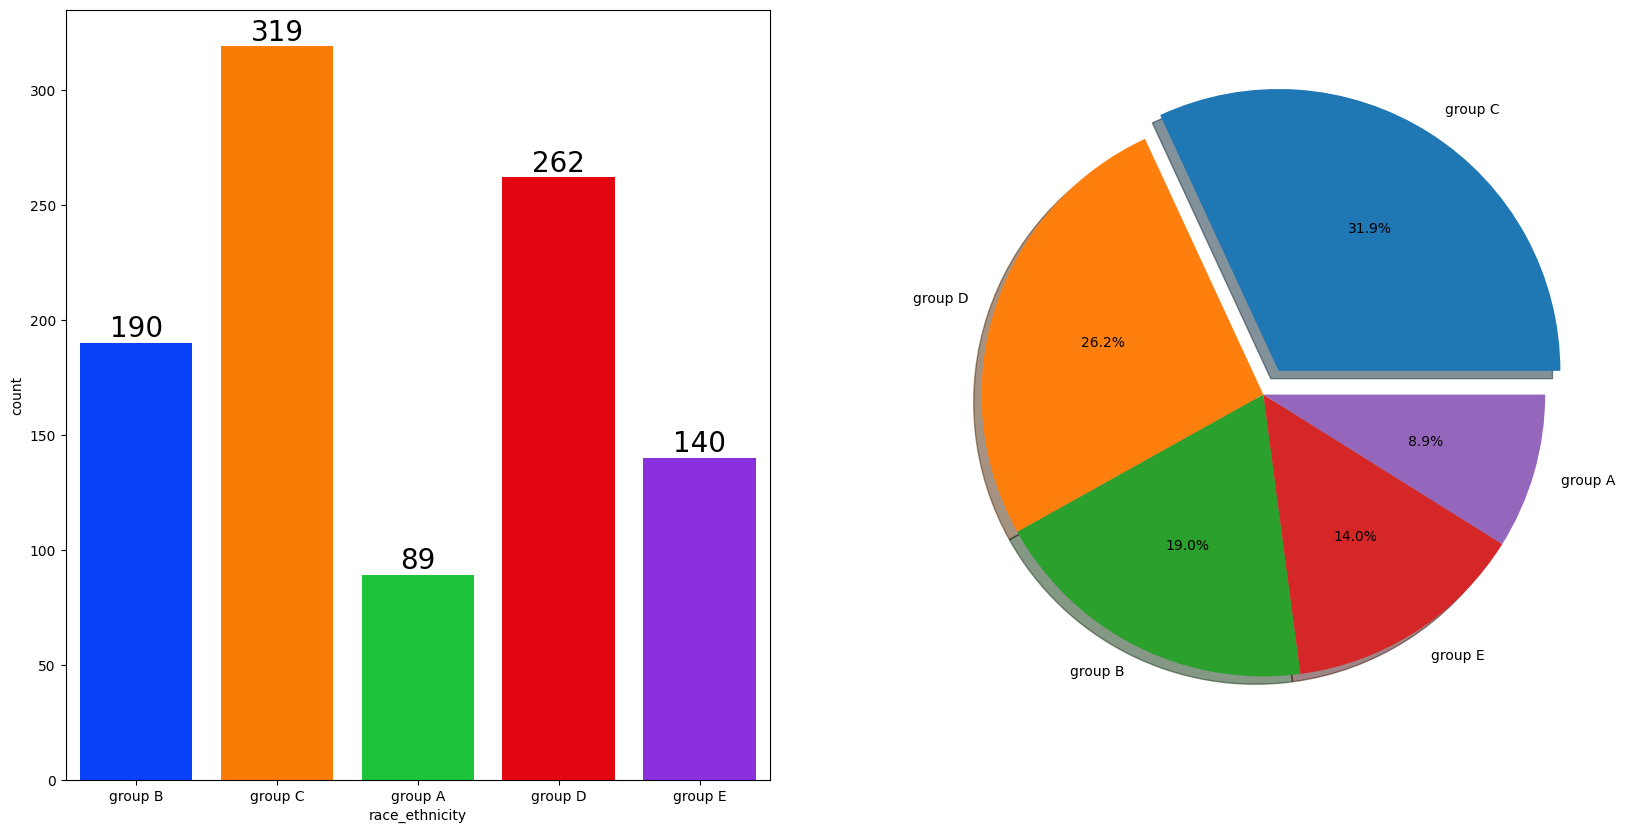

In [198]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x='race_ethnicity',palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,size=20)

plt.pie(x=df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,autopct='%1.1f%%',shadow=True,explode=[0.1,0,0,0,0])
plt.show()    
    

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [201]:
group_ethnicity = df.groupby('race_ethnicity')

In [205]:
group_ethnicity['math_score'].mean().index
group_ethnicity['math_score'].mean().values

array([61.62921348, 63.45263158, 64.46394984, 67.36259542, 73.82142857])

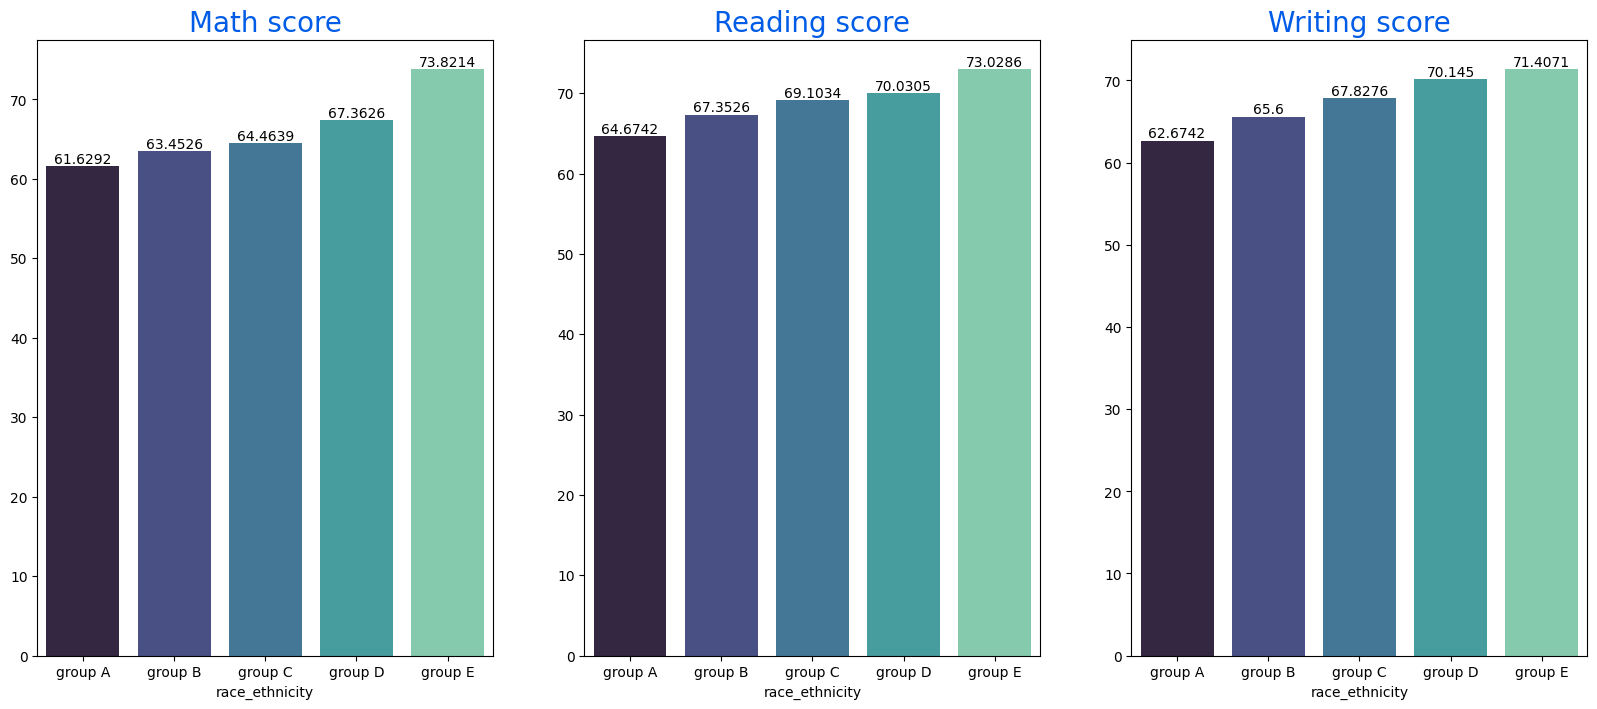

In [215]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_ethnicity['math_score'].mean().index,y=group_ethnicity['math_score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,size=10)
    
ax[1].set_title('Reading score',color='#005ce6',size=20)
sns.barplot(x=group_ethnicity['reading_score'].mean().index,y=group_ethnicity['reading_score'].mean().values,palette='mako',ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container,size=10) 
    
ax[2].set_title('Writing score',color='#005ce6',size=20)
sns.barplot(x=group_ethnicity['writing_score'].mean().index,y=group_ethnicity['writing_score'].mean().values,palette='mako',ax=ax[2])

for container in ax[2].containers:
    ax[2].bar_label(container,size=10)
plt.show()       

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

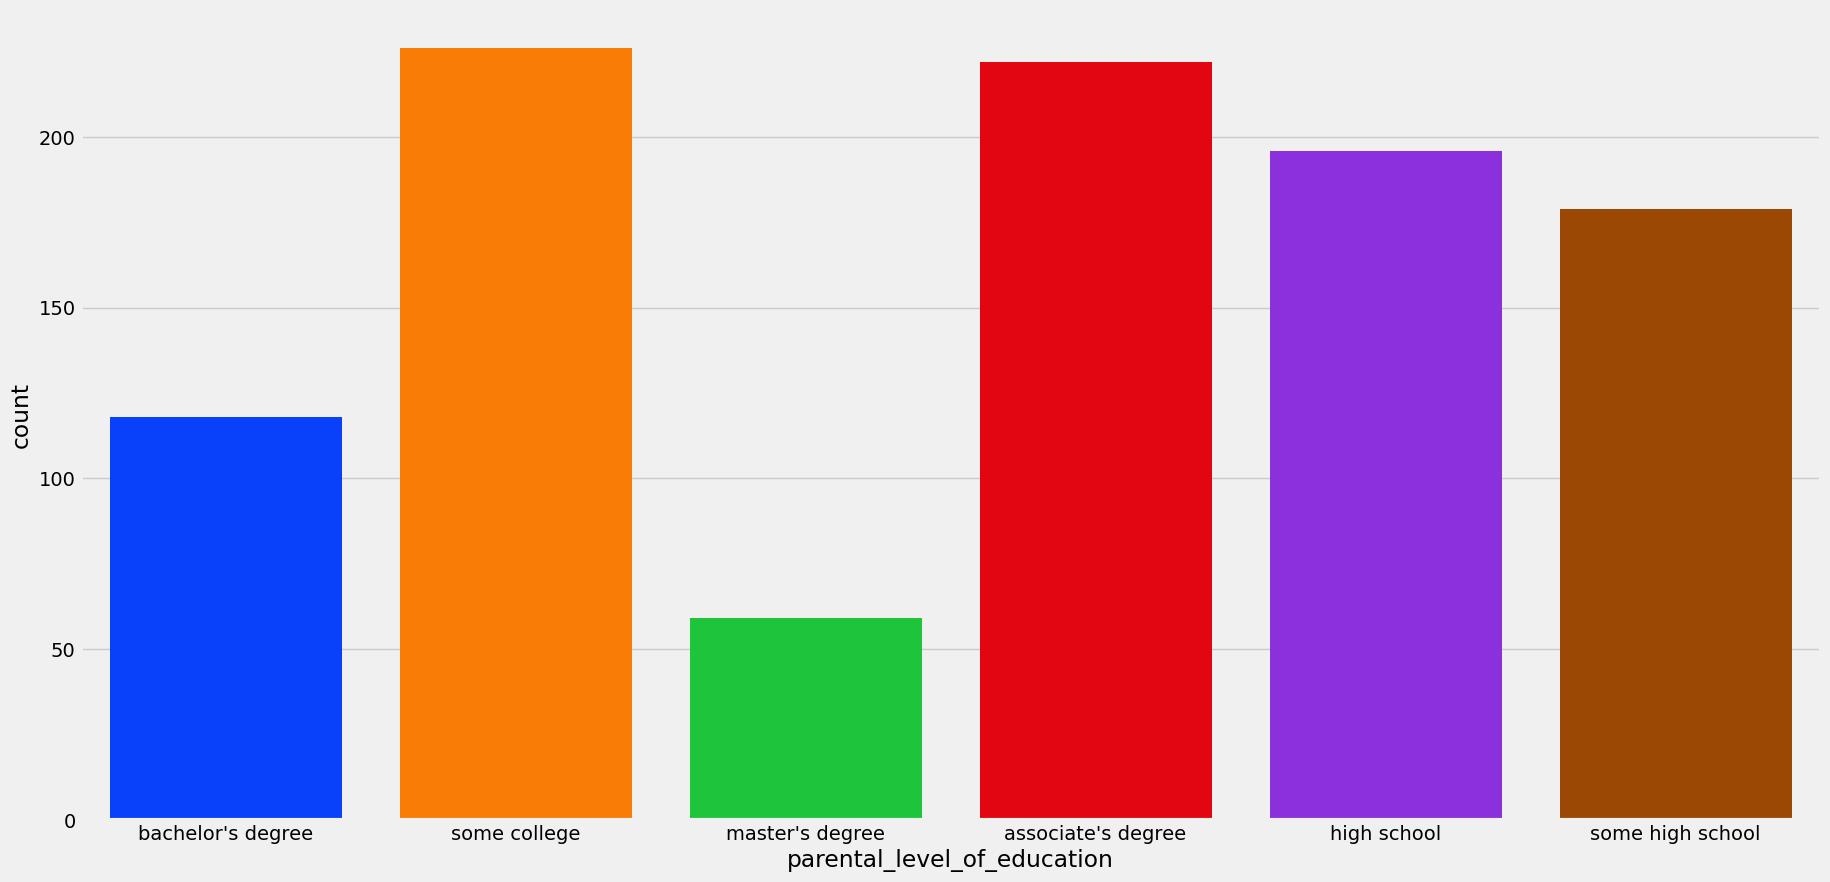

In [220]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='parental_level_of_education',palette='bright',saturation=0.95)
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

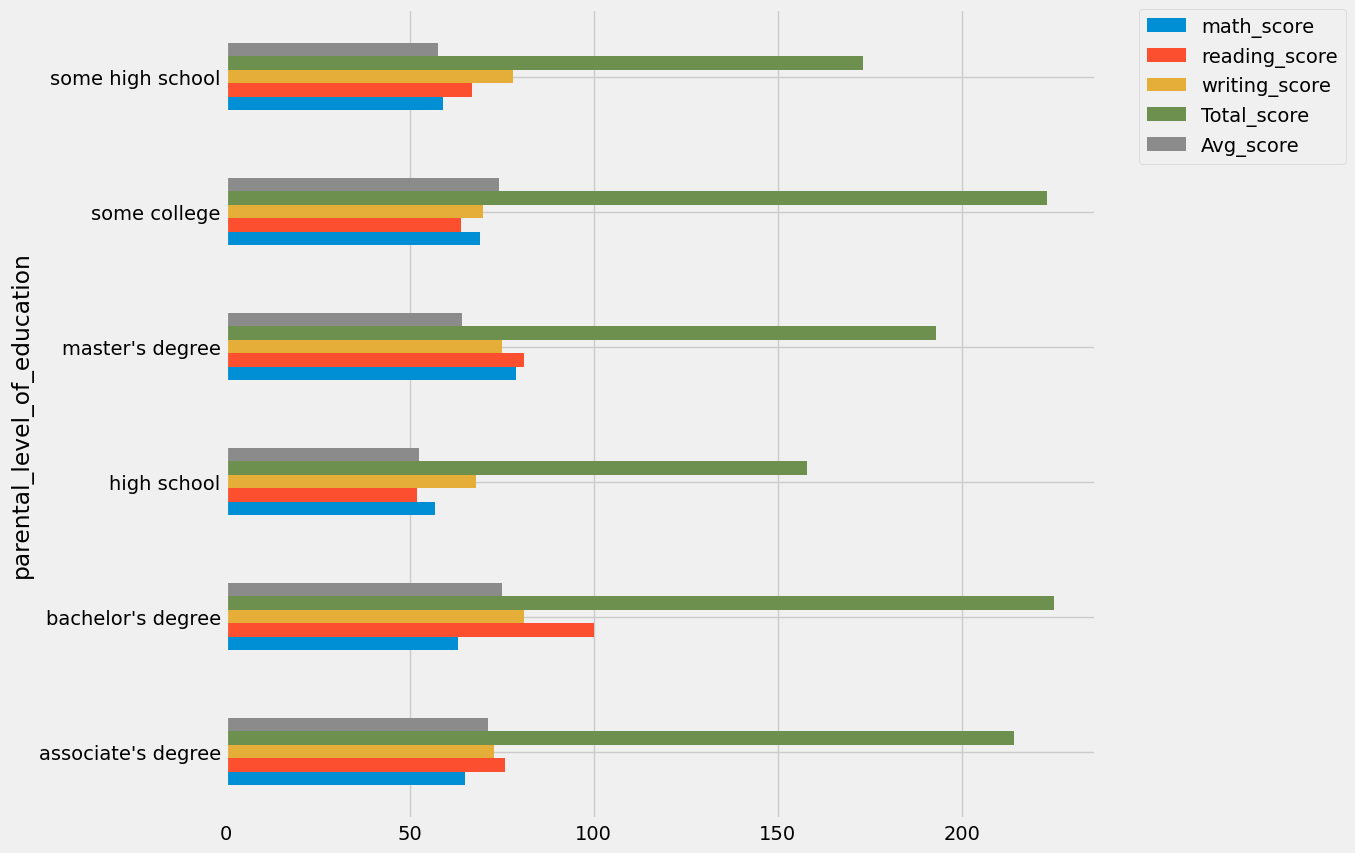

In [230]:
mode_df = df.groupby('parental_level_of_education').apply(lambda x: x.mode().iloc[0])
mode_df.plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

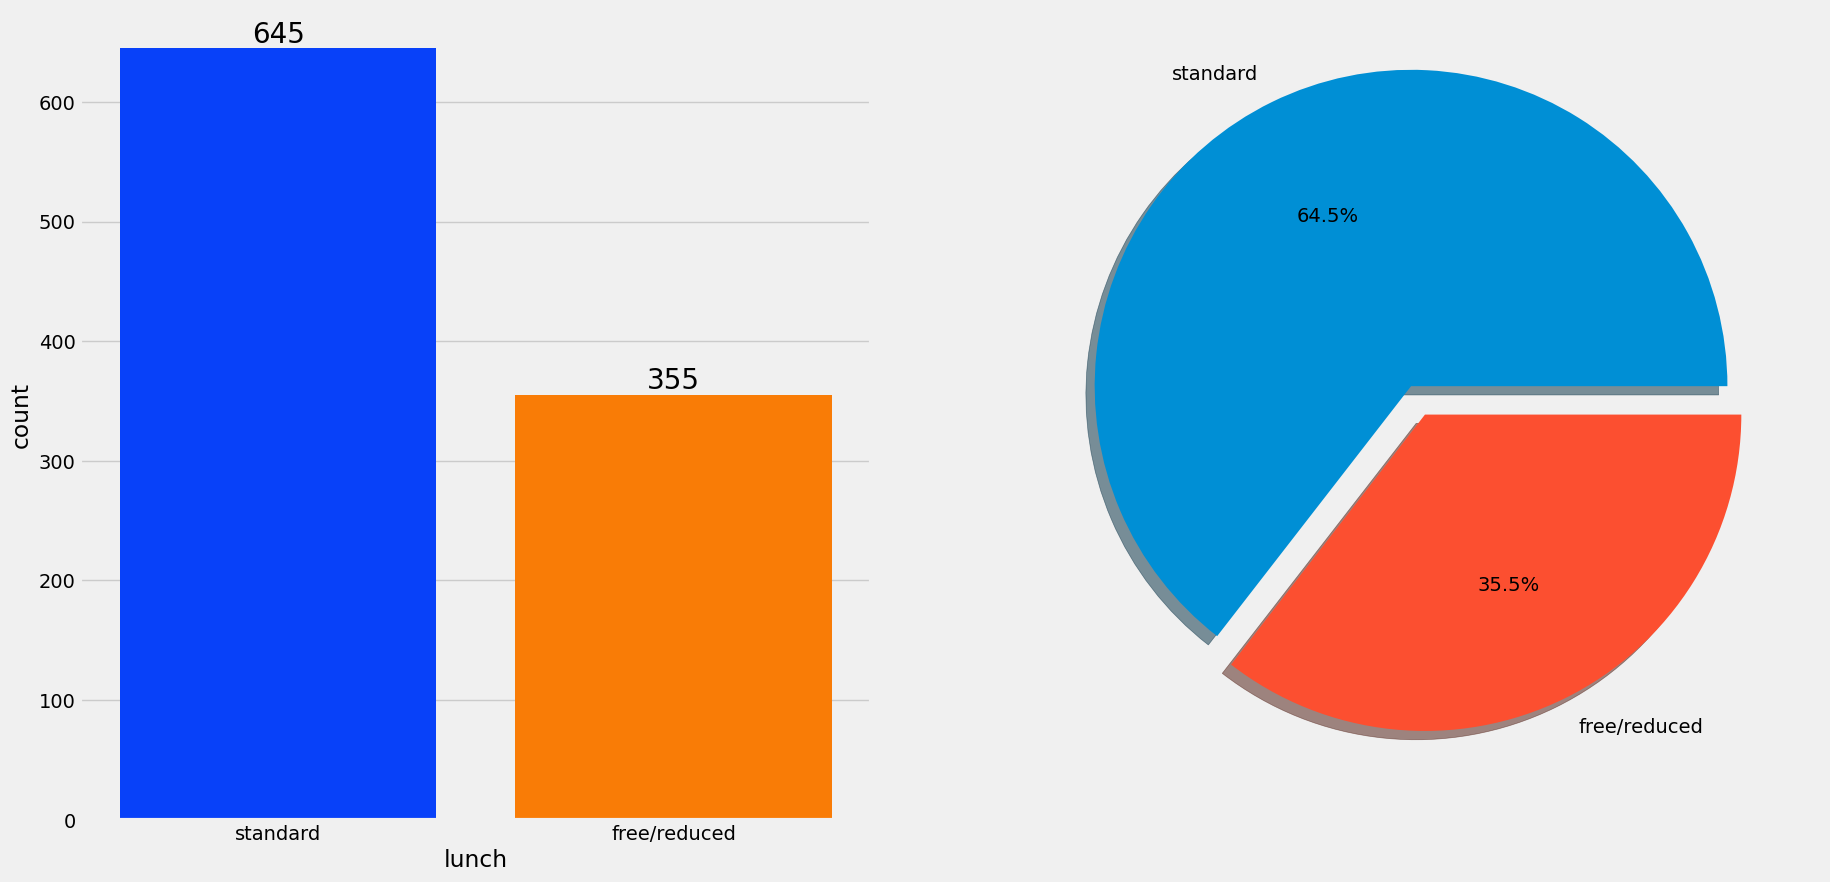

In [239]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(data=df,x='lunch',ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,size=20)

plt.pie(x=df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,autopct='%1.1f%%',shadow=True,explode=[0.1,0])
plt.show()    

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [243]:
group_lunch = df.groupby('lunch').mean(numeric_only=True)

<Axes: xlabel='Total_score', ylabel='Count'>

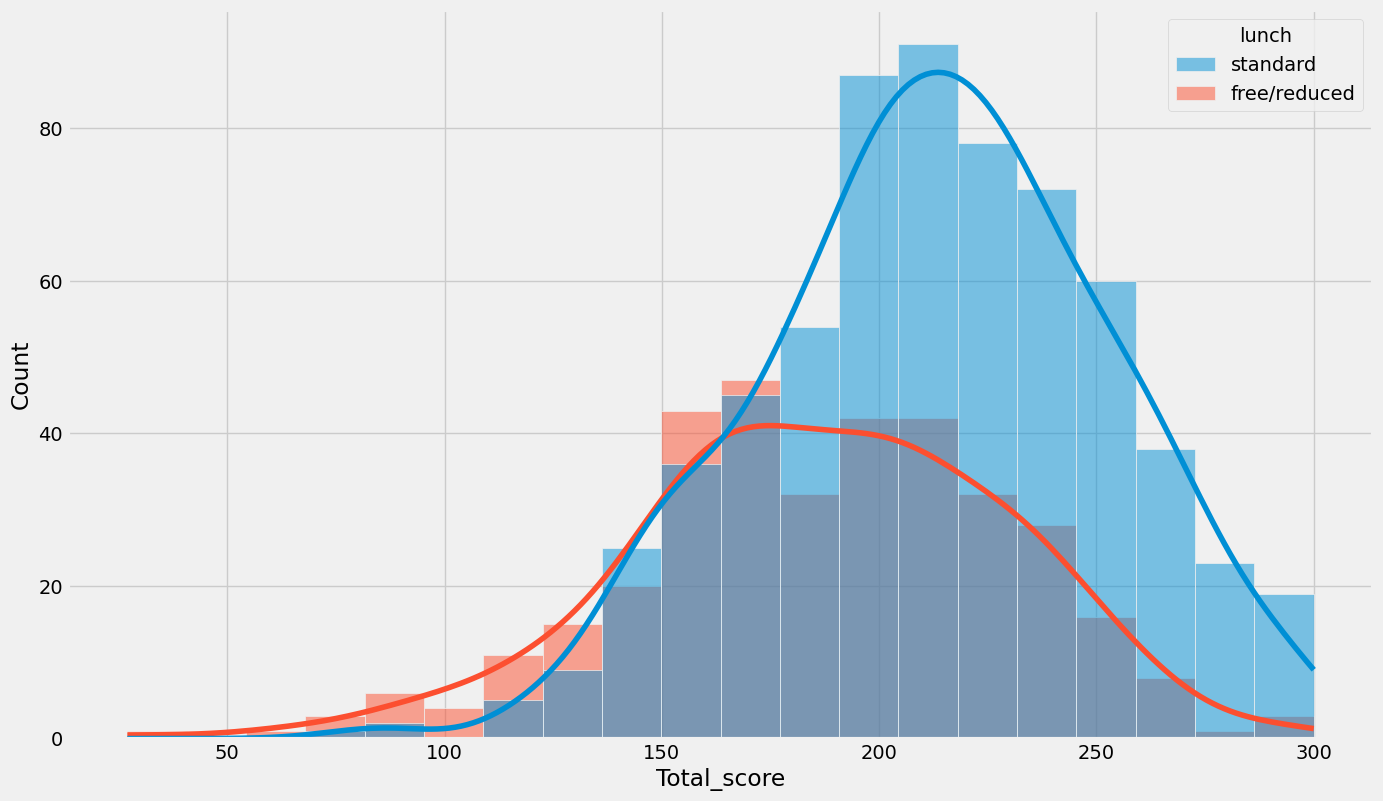

In [255]:
sns.histplot(data=df,x='Total_score',hue='lunch',bins=20,kde=True)

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

<Axes: xlabel='writing_score'>

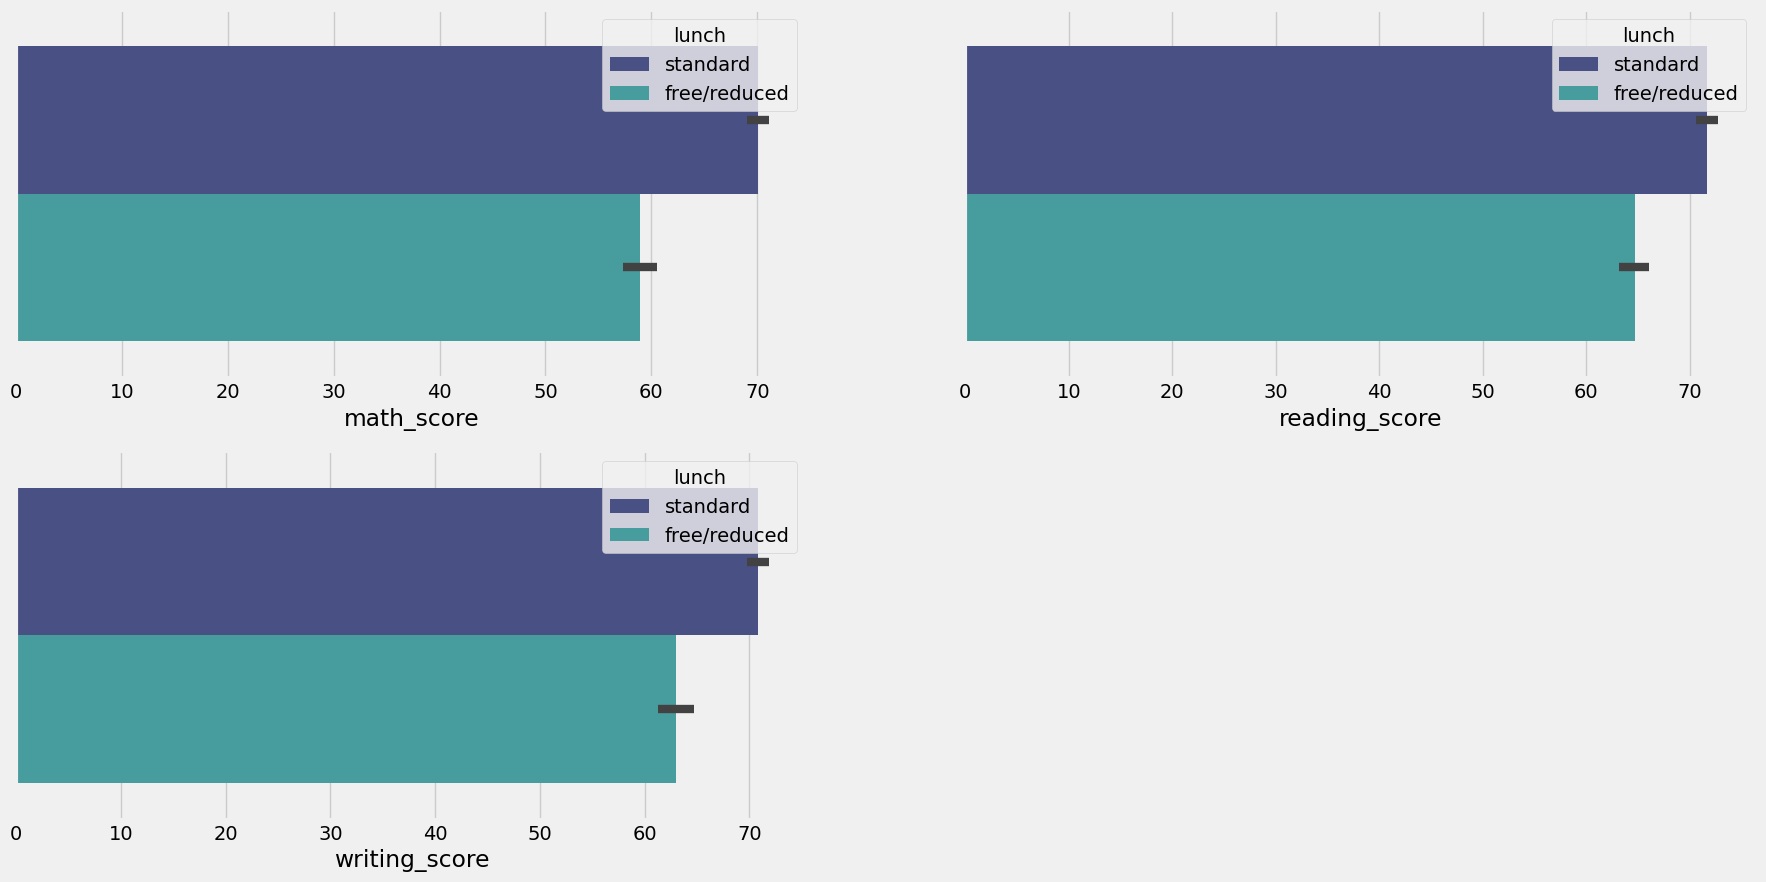

In [259]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.barplot(data=df,x='math_score',hue='lunch',palette='mako')
plt.subplot(222)
sns.barplot(data=df,x='reading_score',hue='lunch',palette='mako')
plt.subplot(223)
sns.barplot(data=df,x='writing_score',hue='lunch',palette='mako')

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

Text(0.5, 1.0, 'Writing score')

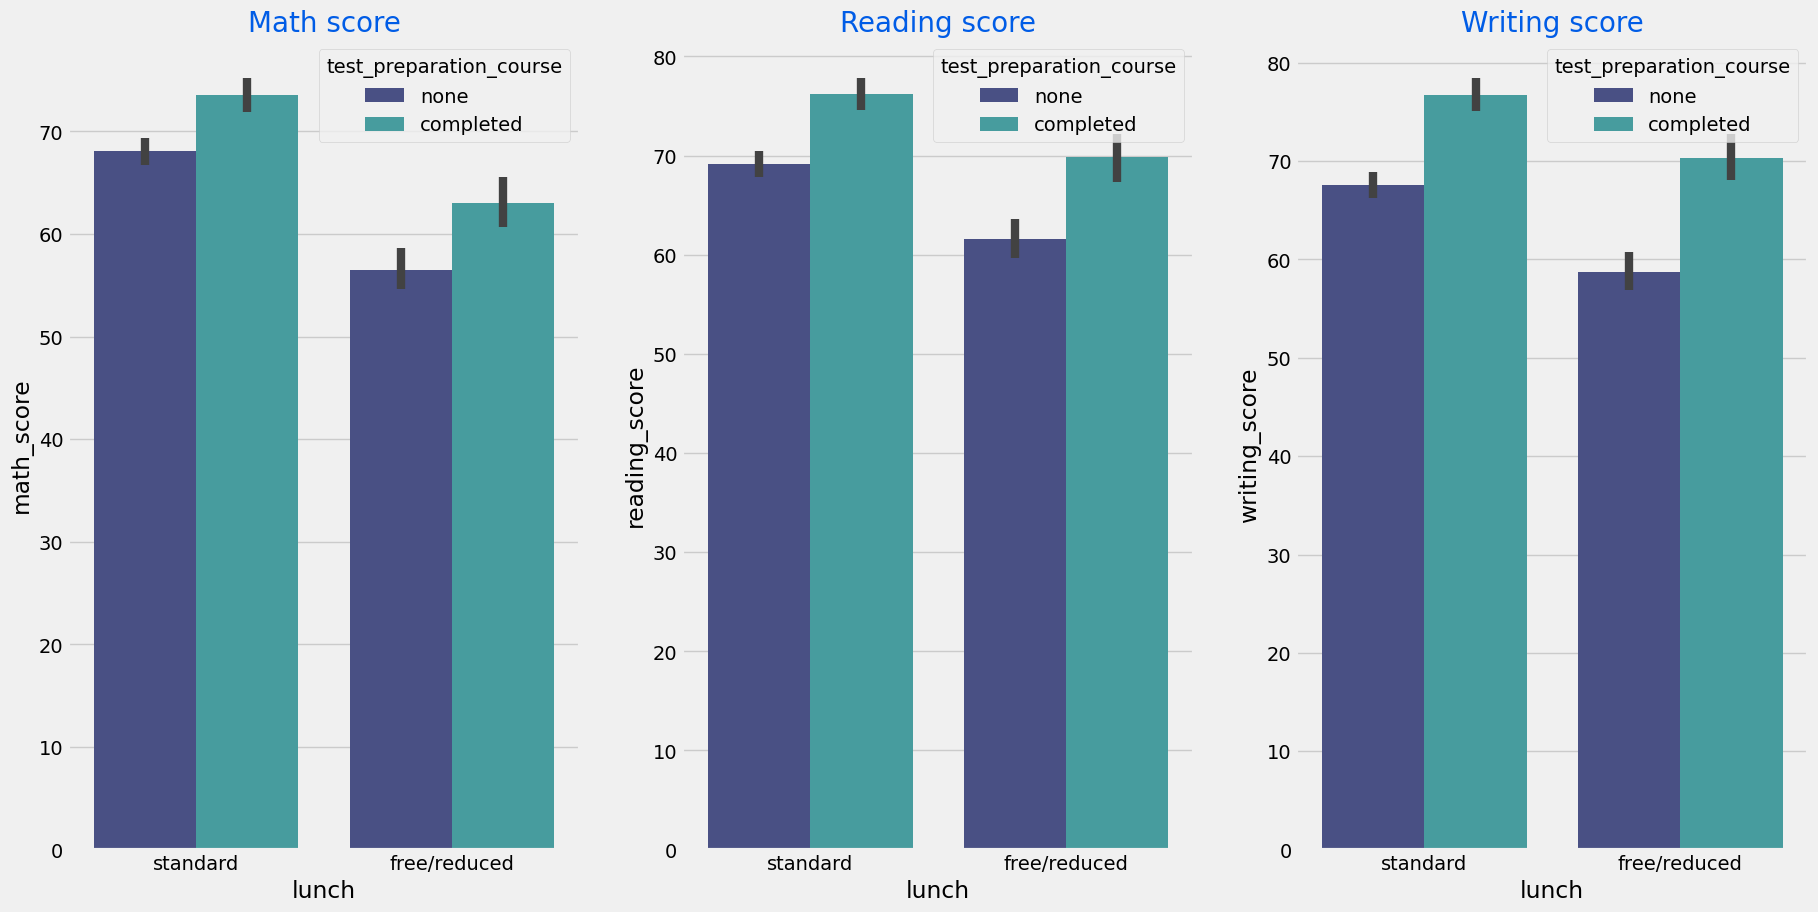

In [270]:
plt.figure(figsize=(20,10))
plt.subplot(131)
sns.barplot(data=df,x='lunch',y='math_score',hue='test_preparation_course',palette='mako')
plt.title('Math score',color='#005ce6',size=20)
plt.subplot(132)
sns.barplot(data=df,x='lunch',y='reading_score',hue='test_preparation_course',palette='mako')
plt.title('Reading score',color='#005ce6',size=20)
plt.subplot(133)
sns.barplot(data=df,x='lunch',y='writing_score',hue='test_preparation_course',palette='mako')
plt.title('Writing score',color='#005ce6',size=20)

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

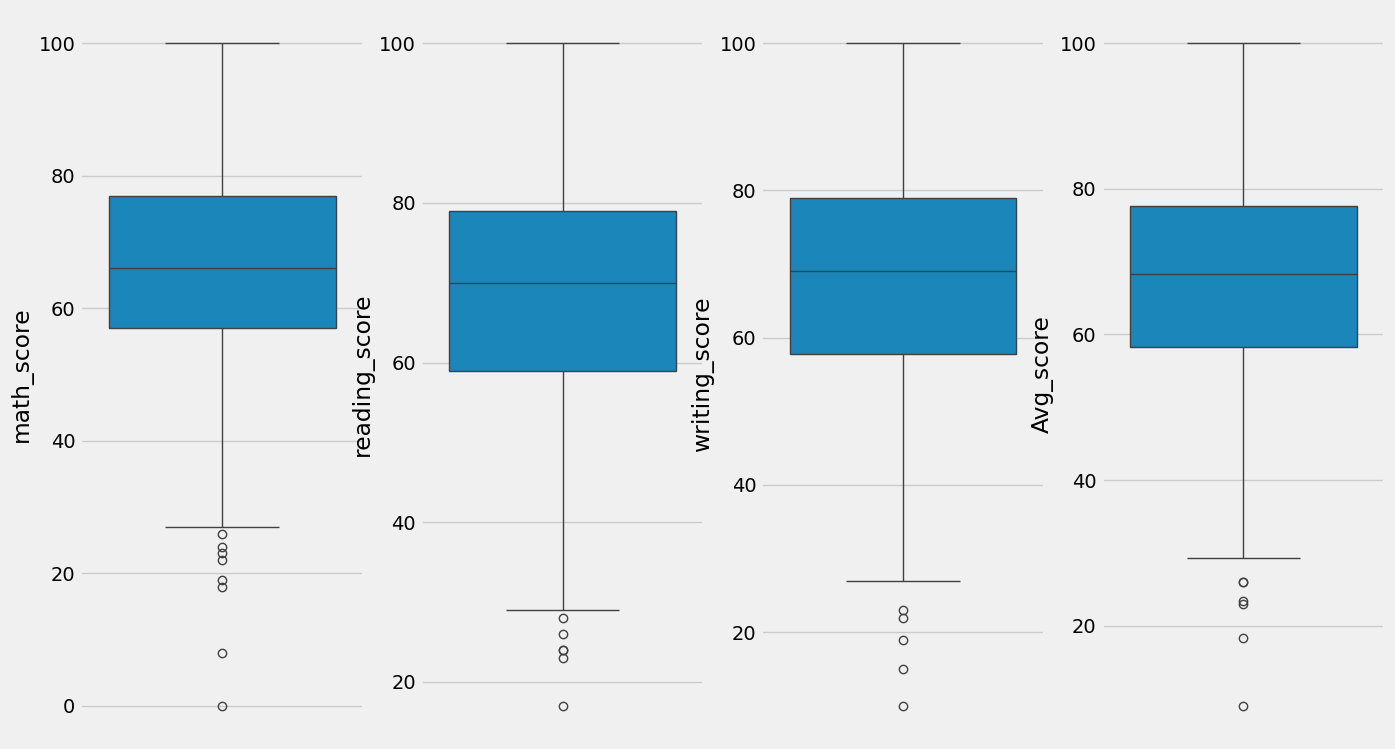

In [295]:
features = ['math_score','reading_score','writing_score','Avg_score']
for feature in features:
    plt.subplot(1,4,features.index(feature)+1)
    sns.boxplot(data=df[feature])

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

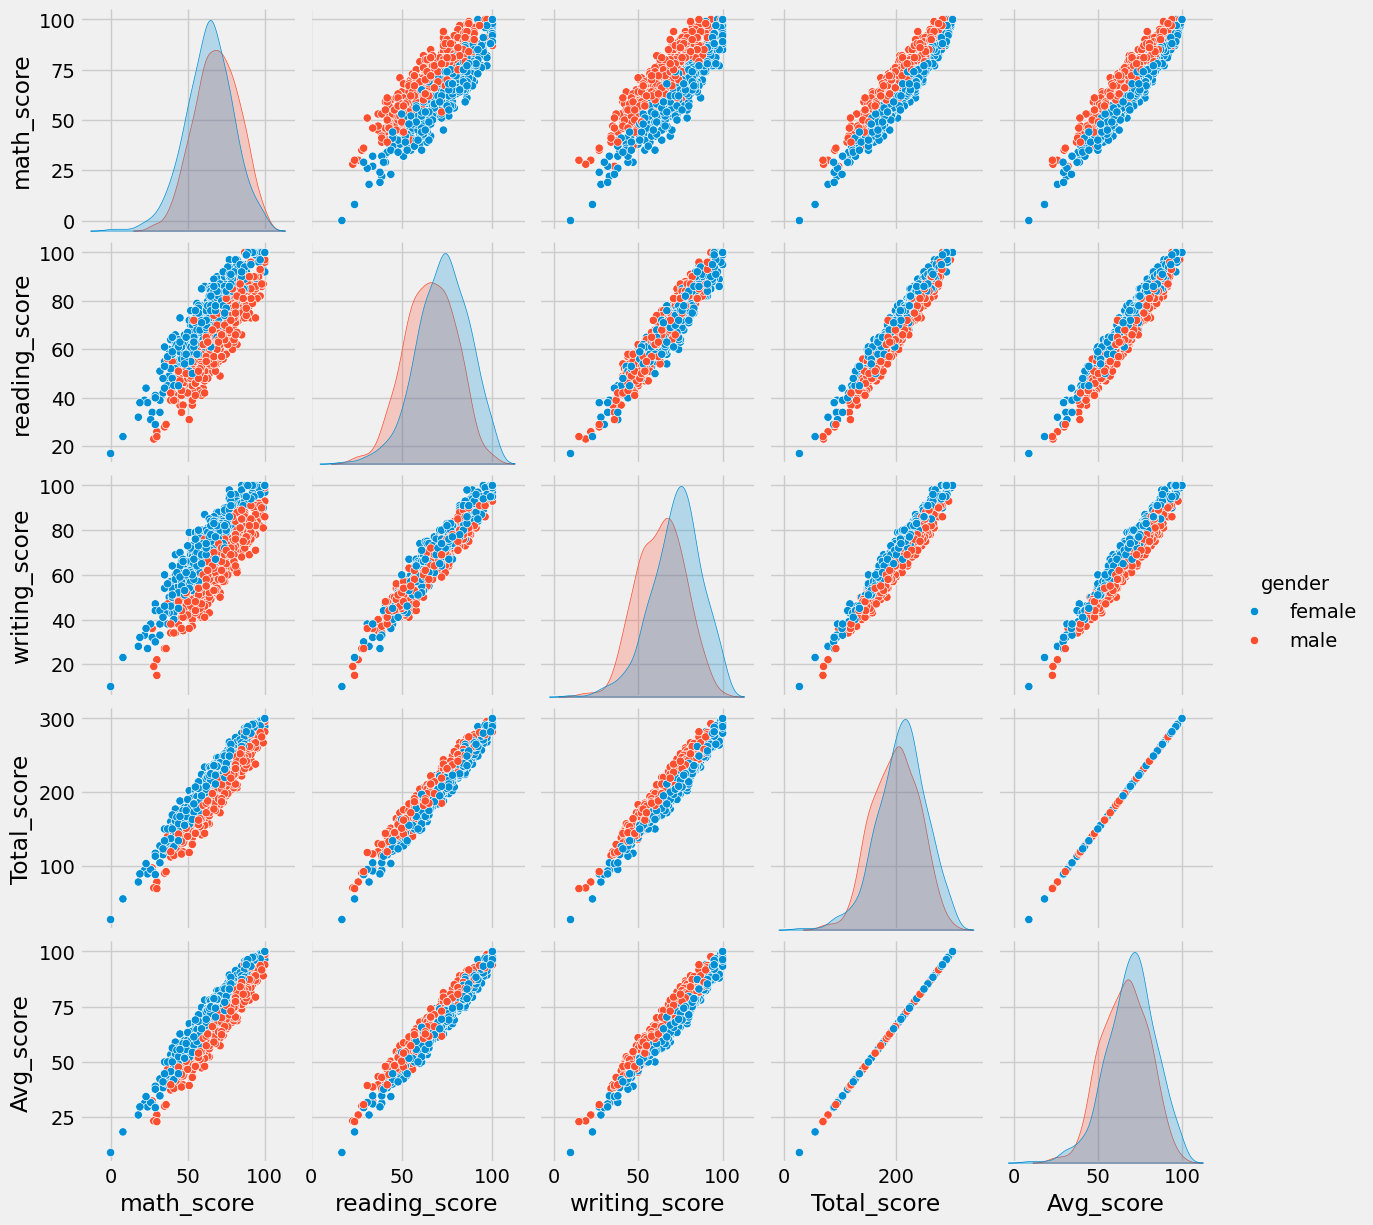

In [296]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.